In [ ]:
tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
# Getting MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [ ]:
# Loading MNIST Dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Training Shapes
print("x_train shape is : ",x_train.shape)
print("y_train shape is : ",y_train.shape)

x_train shape is :  (60000, 28, 28)
y_train shape is :  (60000,)


In [ ]:
#Testing Shapes
print("x_test shape is : ",x_test.shape)
print("y_test shape is : ",y_test.shape)

x_test shape is :  (10000, 28, 28)
y_test shape is :  (10000,)


In [ ]:
#First Element Shape
x_train[1].shape

(28, 28)

In [ ]:
#
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

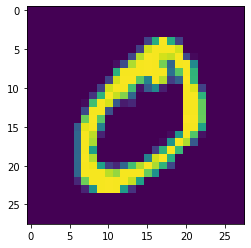

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [ ]:
y_train[1]

0

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

In [ ]:
x_train[1].shape

(784,)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation='relu',name='first_dense'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu',name='second_dense'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_dense (Dense)          (None, 128)               100480    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
second_dense (Dense)         (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [ ]:
# Function to get updated learning value with each epoch
def step_decay(epoch):
  decay_rate = 1
  intial_learning_rate = 0.01
  lrate = intial_learning_rate * (1/(1+ (decay_rate * epoch)))
  print(lrate)
  print(epoch)
  return lrate

# At every epoch, callbacks get updated learing rate value from step_decay function
lrate=tf.keras.callbacks.LearningRateScheduler(step_decay)

model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
print(round(model.optimizer.lr.numpy(), 5))

0.01


In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=512,validation_split=0.1,callbacks=[lrate])
round(model.optimizer.lr.numpy(), 10)

0.01
0
Epoch 1/10
106/106 [==============================] - 1s 12ms/step - loss: 1.3047 - accuracy: 0.6161 - val_loss: 1.5191 - val_accuracy: 0.7432
0.005
1
Epoch 2/10
106/106 [==============================] - 1s 10ms/step - loss: 0.7218 - accuracy: 0.8237 - val_loss: 0.9612 - val_accuracy: 0.8447
0.003333333333333333
2
Epoch 3/10
106/106 [==============================] - 1s 10ms/step - loss: 0.6208 - accuracy: 0.8525 - val_loss: 0.6528 - val_accuracy: 0.8775
0.0025
3
Epoch 4/10
106/106 [==============================] - 1s 10ms/step - loss: 0.5687 - accuracy: 0.8647 - val_loss: 0.5200 - val_accuracy: 0.8933
0.002
4
Epoch 5/10
106/106 [==============================] - 1s 10ms/step - loss: 0.5365 - accuracy: 0.8733 - val_loss: 0.4625 - val_accuracy: 0.8992
0.0016666666666666666
5
Epoch 6/10
106/106 [==============================] - 1s 10ms/step - loss: 0.5128 - accuracy: 0.8778 - val_loss: 0.4351 - val_accuracy: 0.9013
0.0014285714285714286
6
Epoch 7/10
106/106 [===================

0.001

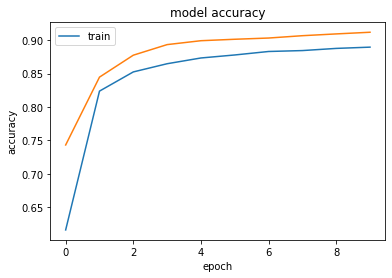

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

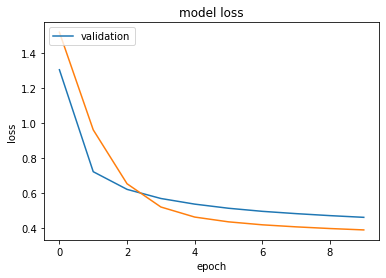

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.legend(['validation'], loc='upper left')
plt.show()

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
loss, accuracy=model.evaluate(x_test,y_test,batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8990


# **Standardizing** 


*   Used when distribution of data is known generally Gaussian Distribuion and all features are in same range
*   Brings data at zero center with standard deviation of 1


---
Procedure

*   Substract Mean from each input
*   Devide by standard variance






In [ ]:
import numpy as np
# input
x = np.array([9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9, 6, 9, 4])

# substract mean from each input
x_mean = np.mean(x)
x1 = x - x_mean

# calculate variance
x2 = np.square(x1)
x2 = np.average(x2)
variance = np.sqrt(x2)
print(variance)

# Rescale
rescaled_x = x1/variance
print(rescaled_x)

2.9832867780352594
[ 0.67040152 -1.67600381 -0.67040152 -1.00560228  1.67600381  0.
  0.33520076  1.34080305  0.67040152 -1.34080305  0.         -1.00560228
  1.67600381 -0.67040152 -1.00560228  1.00560228  0.67040152 -0.33520076
  0.67040152 -1.00560228]


# **Normalizing**

*   Used when distribution is known or unknown and different feature are from different range
*   Can be done using L1 or L2 form


In [ ]:
tf.keras.utils.normalize??

In [ ]:
import tensorflow as tf

x = [[1,2000],[1,3000]]
x = tf.keras.utils.normalize(x)
print(x)

[[4.99999938e-04 9.99999875e-01]
 [3.33333315e-04 9.99999944e-01]]


In [ ]:
print(np.sum(np.square(x[0])))

1.0


# Inside Model

In [ ]:
model.layers

In [ ]:
model.layers[0]

In [ ]:
model.layers[0].kernel

<tf.Variable 'first_dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-0.01427973,  0.04756763,  0.00431318, ..., -0.04038262,
         0.02809841,  0.00346927],
       [-0.02672273, -0.07363133,  0.02656873, ...,  0.03109603,
        -0.00323097,  0.05163617],
       [-0.02737255,  0.04983372,  0.0534192 , ...,  0.00570831,
         0.08039042, -0.00604991],
       ...,
       [-0.01981526,  0.02518877, -0.03827467, ..., -0.02186032,
         0.02838526,  0.05963471],
       [-0.07076503, -0.07312243, -0.07799355, ..., -0.06188494,
         0.00618014, -0.07863987],
       [-0.0204359 ,  0.02168094, -0.05911443, ..., -0.02499377,
        -0.05860601,  0.06032672]], dtype=float32)>

In [ ]:
model.layers[1].input

<tf.Tensor 'first_dense/Relu:0' shape=(None, 128) dtype=float32>